![alt text](<download (2).png>)

In [62]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

In [63]:
df = pd.read_csv("Online Sales Data.csv")
df.head(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card


In [64]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [65]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [68]:
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [70]:
df.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


In [71]:
df.describe(include = 'all')

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,6,232,NaN,NaN,NaN,3,3
top,NaN,NaN,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card
freq,NaN,NaN,40,2,NaN,NaN,NaN,80,120
mean,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN
min,10001.00000,2024-01-01 00:00:00,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN
25%,10060.75000,2024-02-29 18:00:00,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN
50%,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN
75%,10180.25000,2024-06-28 06:00:00,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN
max,10240.00000,2024-08-27 00:00:00,NaN,NaN,10.000000,3899.990000,3899.990000,NaN,NaN


In [72]:
df.shape

(240, 9)

In [73]:
print("Total Rows are :",df.shape[0])
print("Total Columns are :",df.shape[1])

Total Rows are : 240
Total Columns are : 9


In [74]:
df['Product Name'].nunique()

232

In [75]:
Product_count= df['Product Category'].value_counts()
Product_count

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

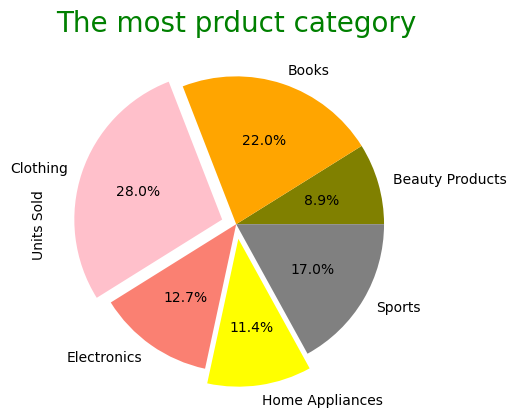

In [113]:
p_category= df.groupby(by='Product Category')['Units Sold'].sum()
p_category.plot(kind="pie",explode=[0,0,0.1,0,0.1,0],autopct='%1.1f%%',colors=("olive","orange","pink","salmon","yellow","gray")).set_title("The most prduct category",fontsize=20,color="green")

plt.show()

# Top-selling products within each category

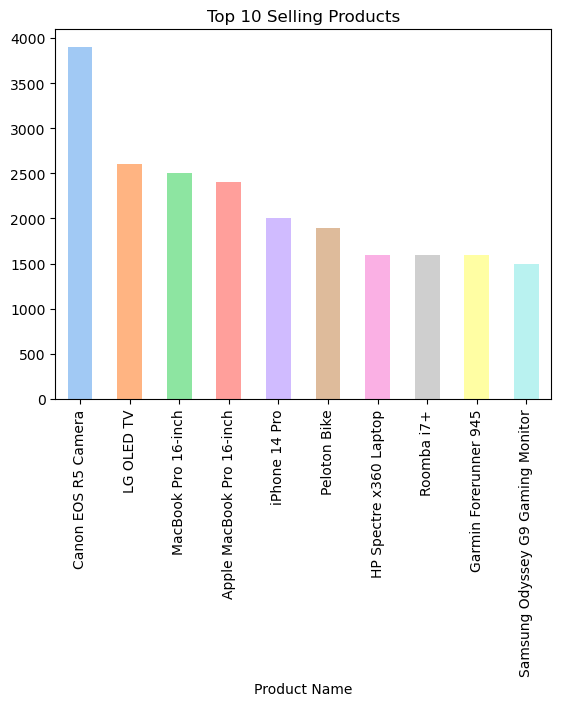

In [115]:
colors = sns.color_palette('pastel')

top_selling_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar', color=colors)
plt.title('Top 10 Selling Products')
plt.show()

# Which product category has the highest total revenue?

In [78]:
# Grouping by Product Category and summing the Total Revenue
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='Total Revenue', ascending=False)

print(category_revenue)

  Product Category  Total Revenue
3      Electronics       34982.41
4  Home Appliances       18646.16
5           Sports       14326.52
2         Clothing        8128.93
0  Beauty Products        2621.90
1            Books        1861.93


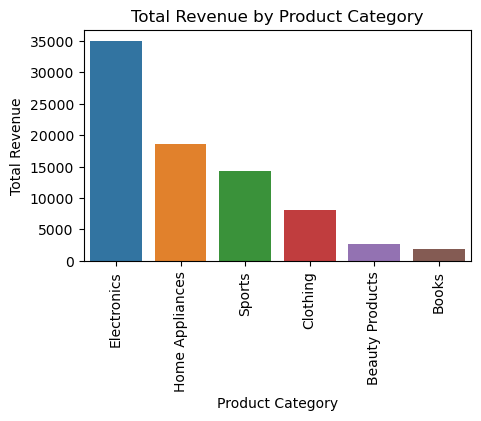

In [79]:
# Plotting the results
plt.figure(figsize=(5, 3))
sns.barplot(x='Product Category', y='Total Revenue', data=category_revenue)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation = 90)
plt.ylabel('Total Revenue')
plt.show()

Note " Electronics has the hights category

# Which product name generates the highest total revenue?

In [80]:
# Grouping by Product Name and summing the Total Revenue
product_revenue = df.groupby('Product Name')['Total Revenue'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='Total Revenue', ascending=False)

print(product_revenue)

                                    Product Name  Total Revenue
39                           Canon EOS R5 Camera        3899.99
111                                   LG OLED TV        2599.98
124                          MacBook Pro 16-inch        2499.99
18                     Apple MacBook Pro 16-inch        2399.00
230                                iPhone 14 Pro        1999.98
..                                           ...            ...
130             Neutrogena Hydro Boost Water Gel          16.99
25   Biore UV Aqua Rich Watery Essence Sunscreen          15.00
196           The Ordinary Hyaluronic Acid Serum           6.80
195     The Ordinary Caffeine Solution 5% + EGCG           6.70
197               The Ordinary Niacinamide Serum           6.50

[232 rows x 2 columns]


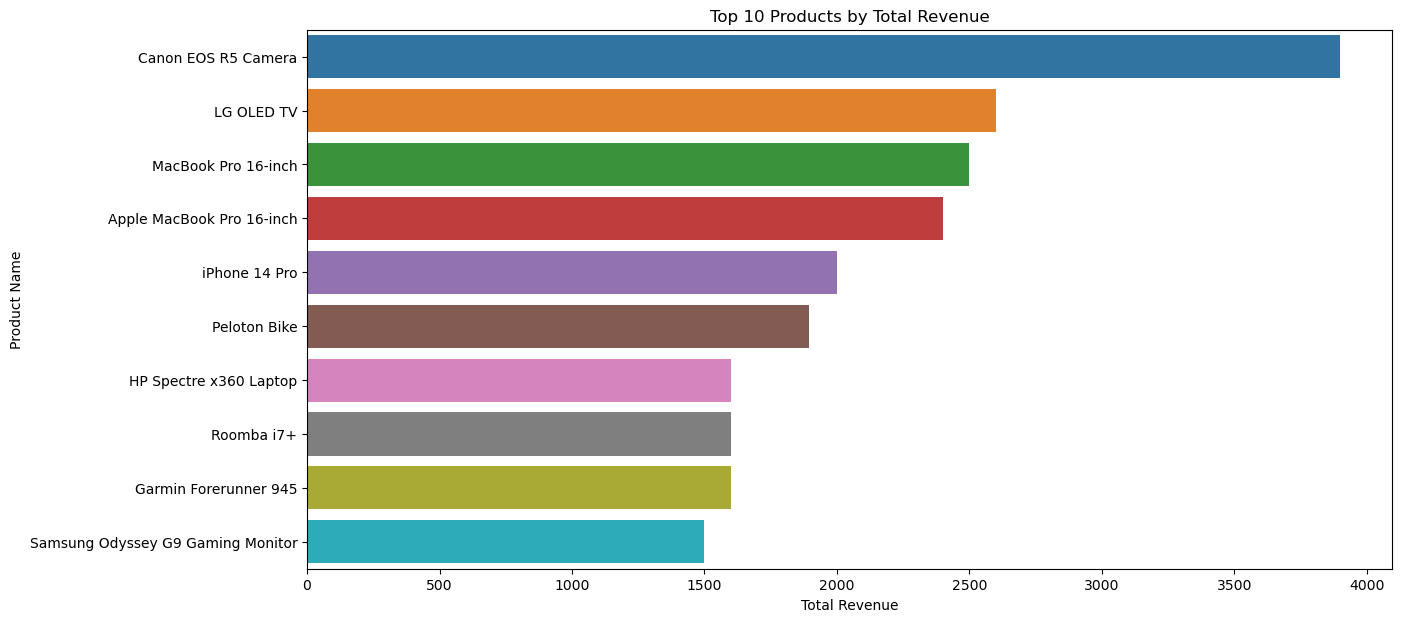

In [81]:
plt.figure(figsize=(14, 7))
top_10_products = product_revenue.head(10)
sns.barplot(x='Total Revenue', y='Product Name', data=top_10_products)
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

# What are the monthly sales trends for total revenue over the given time period?

In [118]:
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].apply(lambda x: calendar.month_name[x])

print(monthly_revenue)

      Month  Total Revenue
0   January       14548.32
1  February       10803.37
2     March       12849.24
3     April       12451.69
4       May        8455.49
5      June        7384.55
6      July        6797.08
7    August        7278.11


# How are the numerical variables related to each other?

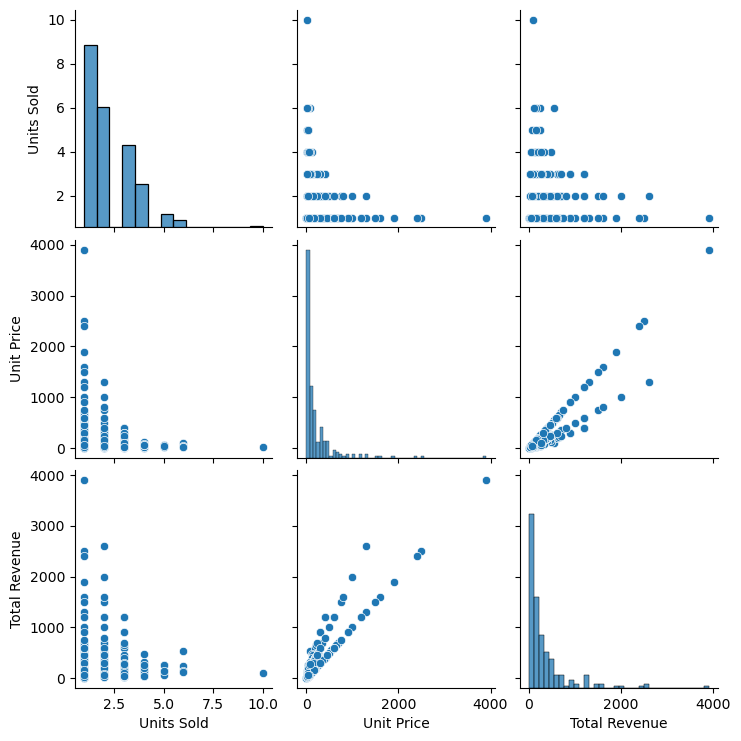

In [84]:
sns.pairplot(df[['Units Sold', 'Unit Price', 'Total Revenue']])
plt.show()

# Which region has the highest total revenue?

In [85]:
region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)
print(region_revenue)

          Region  Total Revenue
2  North America       36844.34
0           Asia       22455.45
1         Europe       21268.06


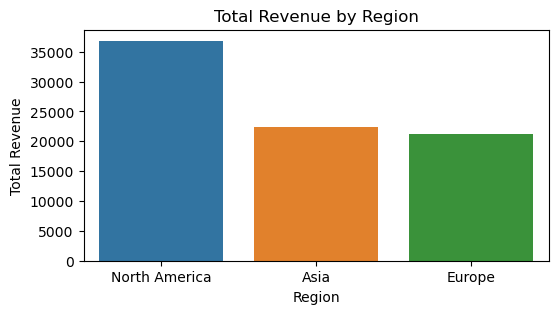

In [86]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Region', y='Total Revenue', data=region_revenue)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

# How does the average unit price vary across different regions?

In [87]:
region_unit_price = df.groupby('Region')['Unit Price'].mean().reset_index().sort_values(by='Unit Price', ascending=False)

print(region_unit_price)

          Region  Unit Price
2  North America   353.87225
1         Europe   190.90425
0           Asia   164.41025


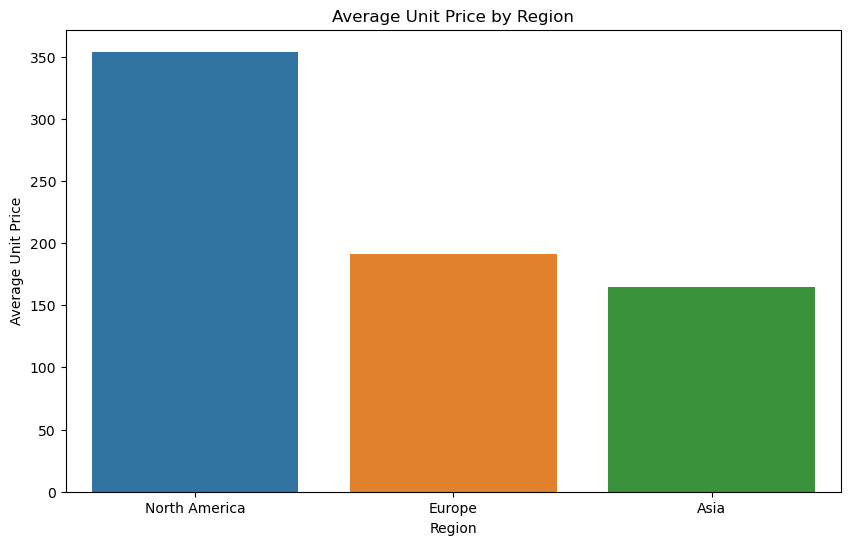

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Unit Price', data=region_unit_price)
plt.title('Average Unit Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Unit Price')
plt.show()

# What is the distribution of units sold per transaction?

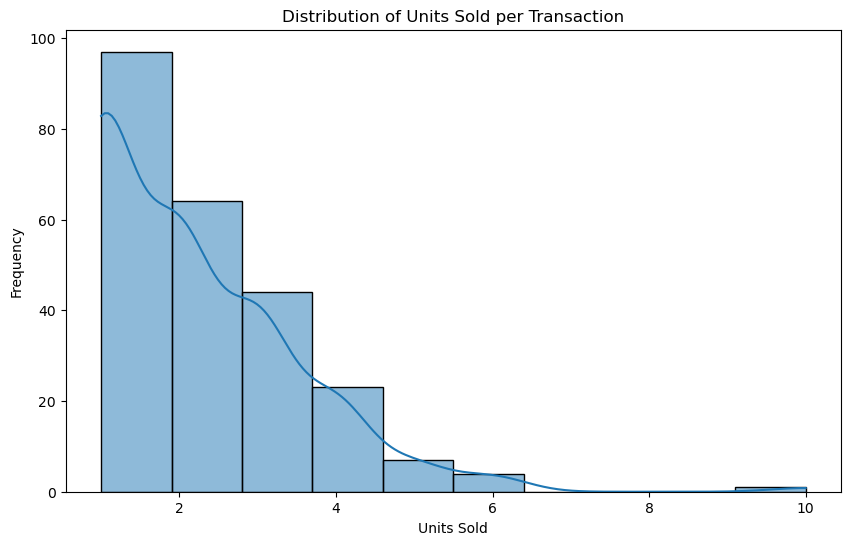

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold per Transaction')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


# Which product category has the highest average units sold per transaction?

In [90]:
category_units_sold = df.groupby('Product Category')['Units Sold'].mean().reset_index().sort_values(by='Units Sold', ascending=False)

print(category_units_sold)

  Product Category  Units Sold
2         Clothing       3.625
1            Books       2.850
5           Sports       2.200
3      Electronics       1.650
4  Home Appliances       1.475
0  Beauty Products       1.150


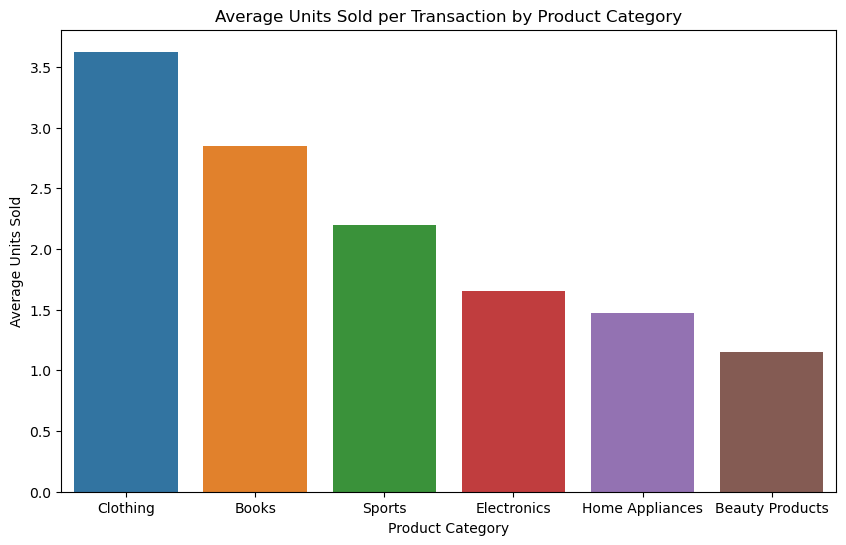

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Units Sold', data=category_units_sold)
plt.title('Average Units Sold per Transaction by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Units Sold')
plt.show()

# What are the most popular payment methods used by customers?

In [92]:
# Counting the number of transactions per Payment Method
payment_methods = df['Payment Method'].value_counts().reset_index(name='Count').rename(columns={'index': 'Payment Method'})
print(payment_methods)

  Payment Method  Count
0    Credit Card    120
1         PayPal     80
2     Debit Card     40


# How do unit prices vary across different product categories?

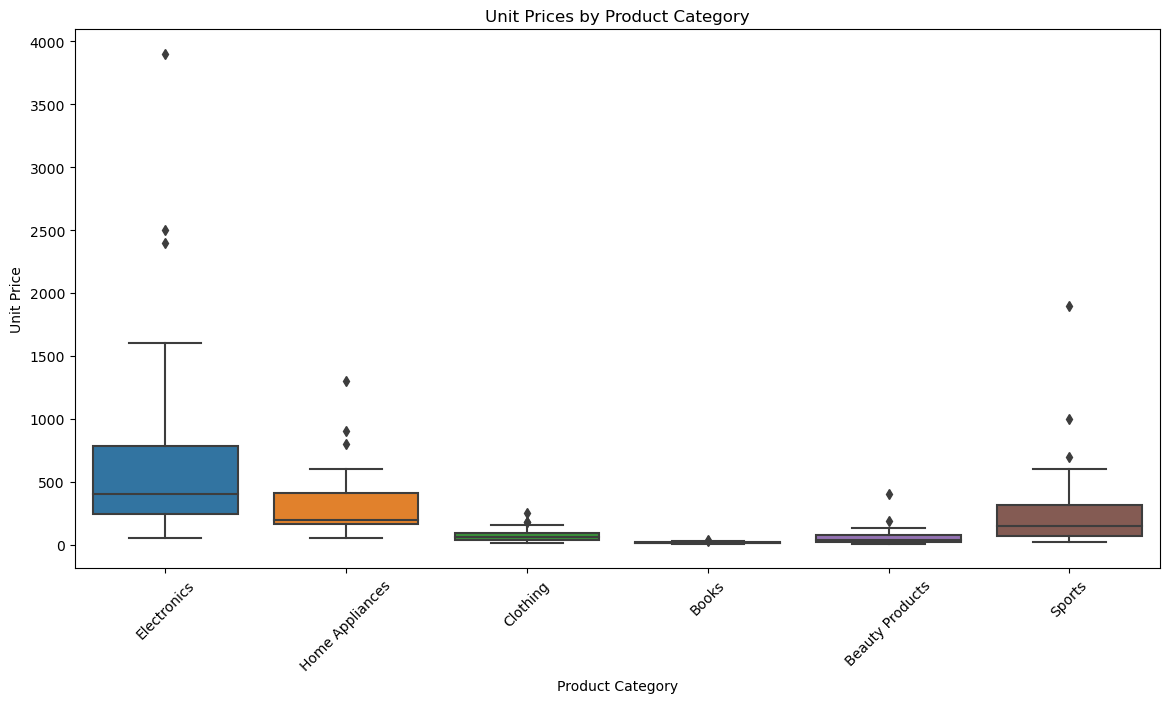

In [93]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Product Category', y='Unit Price', data=df)
plt.title('Unit Prices by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

# How does total revenue vary across different regions?

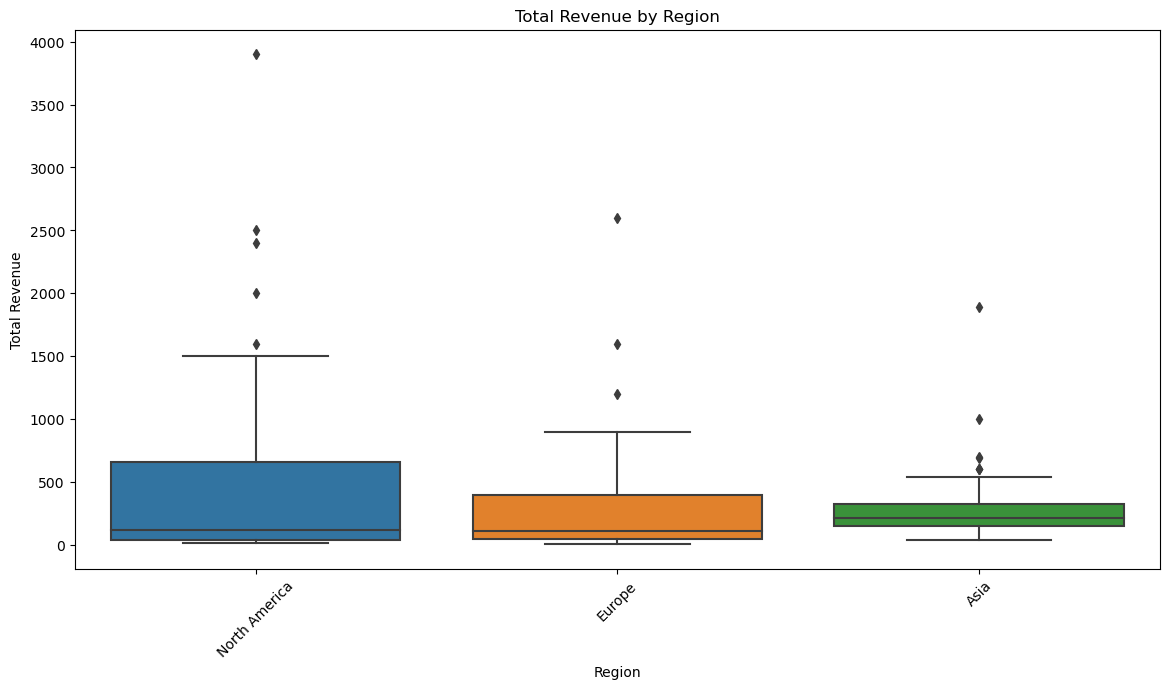

In [94]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Is there a correlation between the number of units sold and the total revenue?

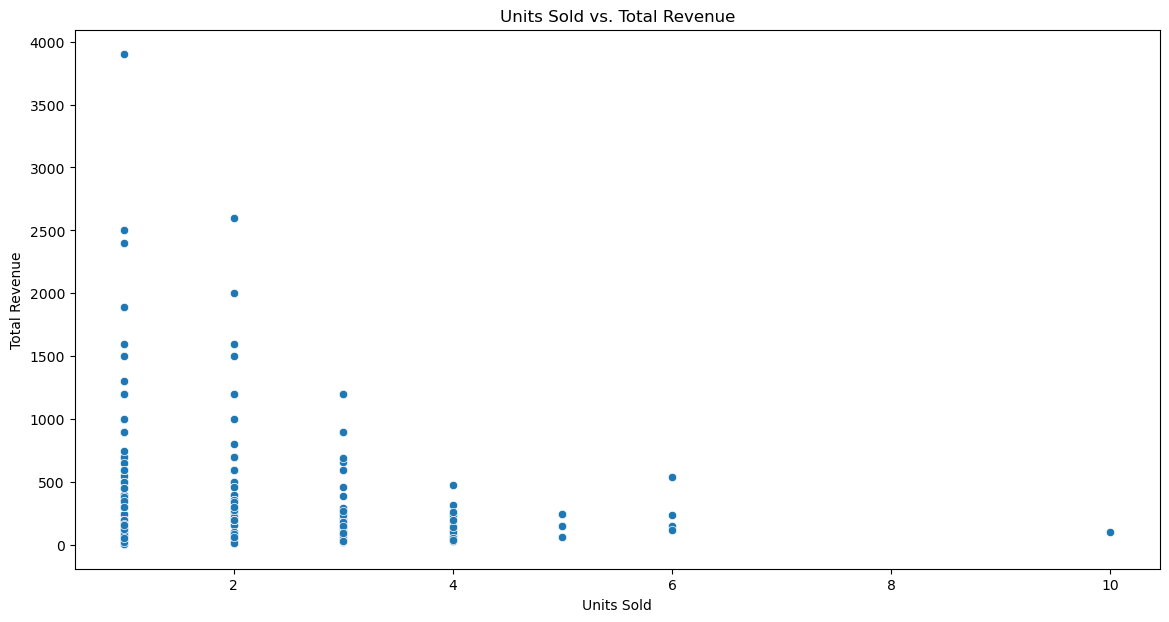

In [95]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Units Sold vs. Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

# How does the unit price relate to the total revenue?

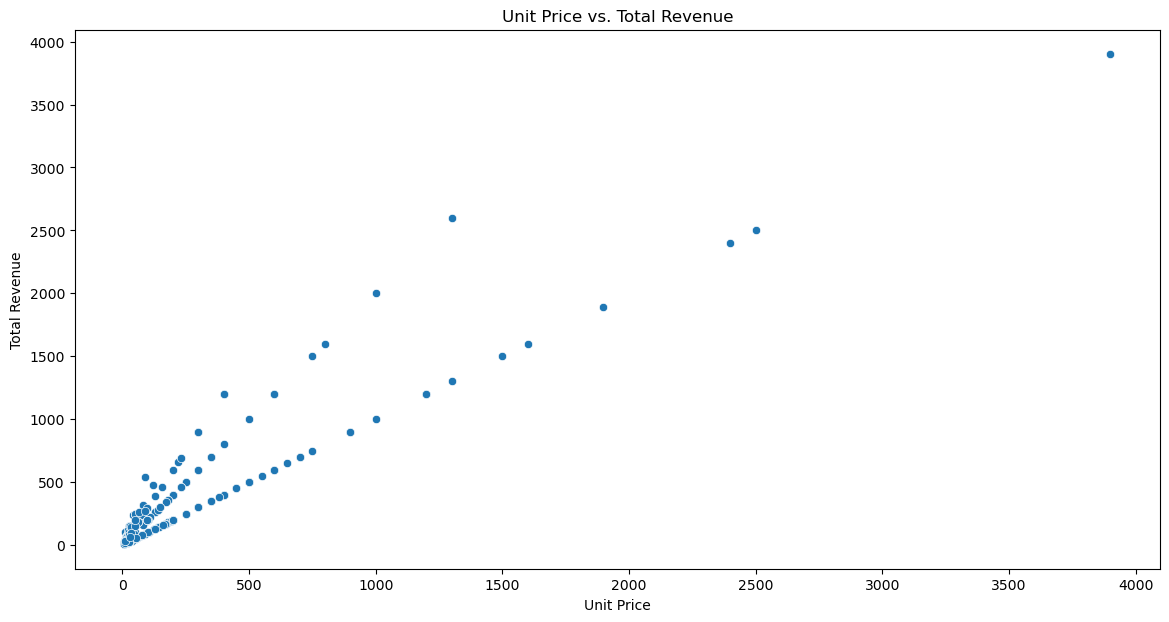

In [96]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df)
plt.title('Unit Price vs. Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.show()

# How does the distribution of units sold vary across different product categories?

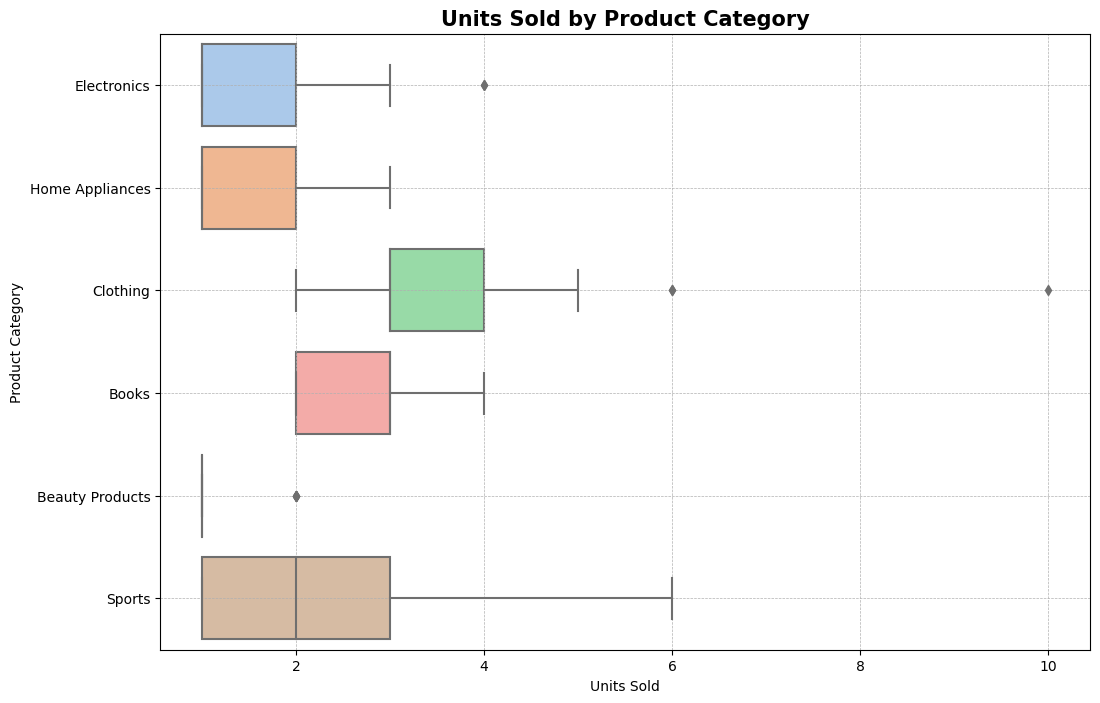

In [119]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Units Sold', y='Product Category', data=df, palette='pastel')

# Set title and labels
plt.title('Units Sold by Product Category', fontsize=15, fontweight='bold')
plt.xlabel('Units Sold')
plt.ylabel('Product Category')

# Customize grid and background
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')

# Show the plot
plt.show()

# What is the distribution of payment methods used across different regions?

In [97]:
conf_matrix = pd.crosstab(df['Region'], df['Payment Method'], margins=True)

print(conf_matrix)

Payment Method  Credit Card  Debit Card  PayPal  All
Region                                              
Asia                     40          40       0   80
Europe                    0           0      80   80
North America            80           0       0   80
All                     120          40      80  240


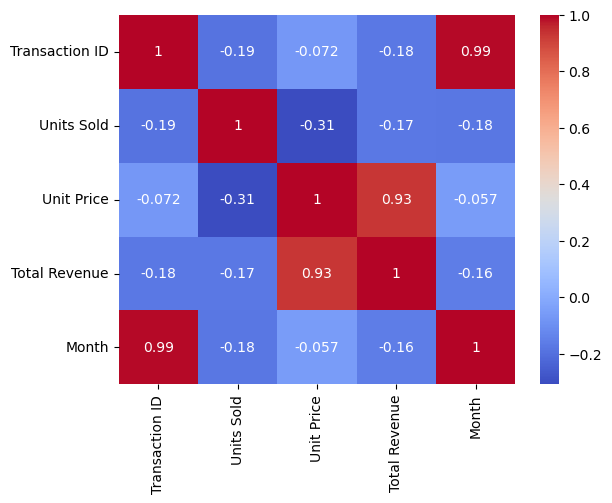

In [98]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Are there any outliers in total revenue within each region?

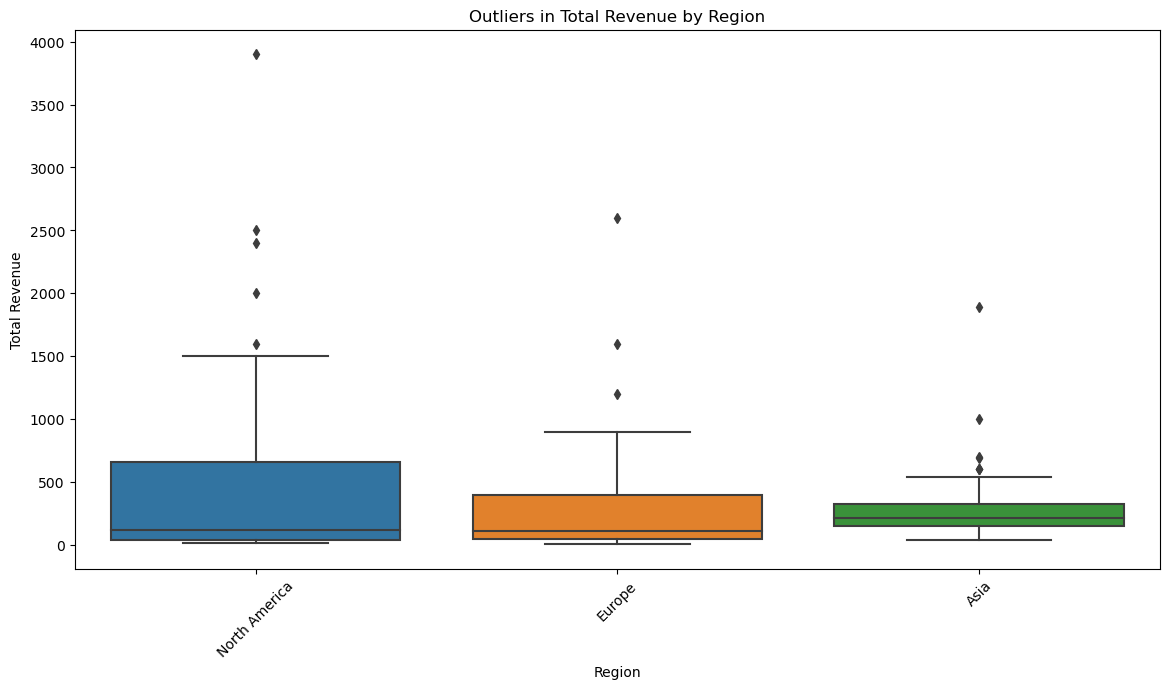

In [99]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Outliers in Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# What is the trend of total revenue over time?

In [109]:
df['Month'] = df['Date'].dt.month_name()

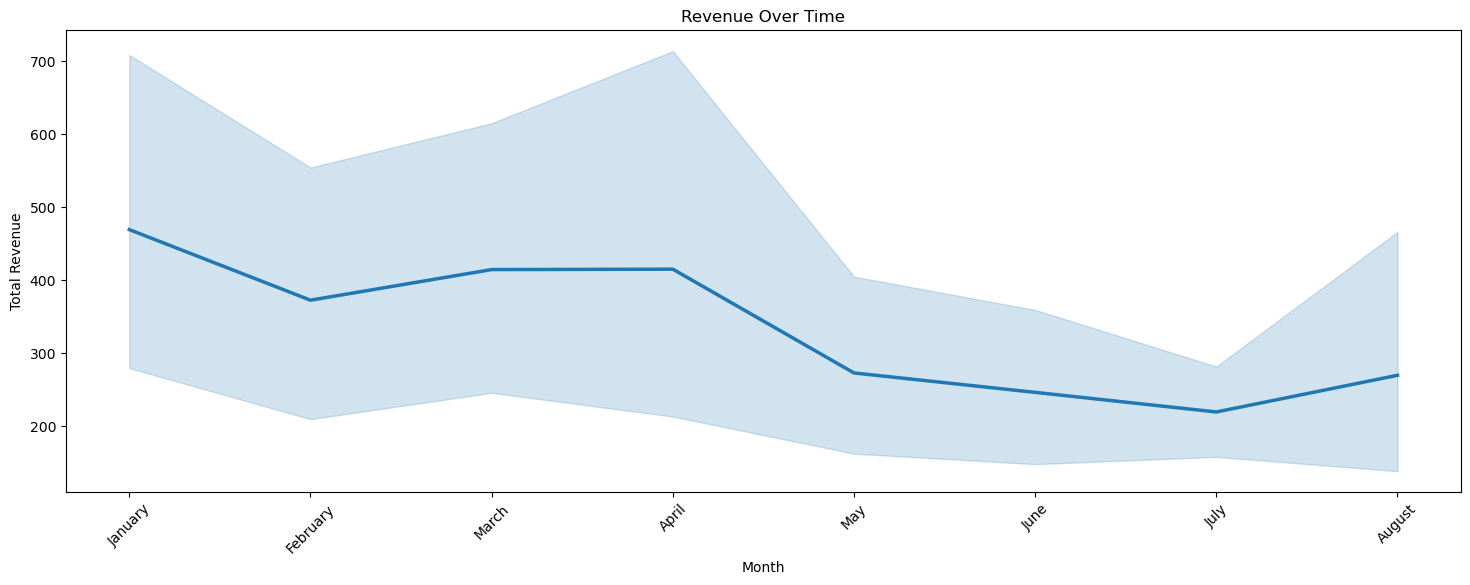

In [110]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Month', y='Total Revenue', linewidth=2.5)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.show()

# How does the total revenue vary over time for different payment methods?

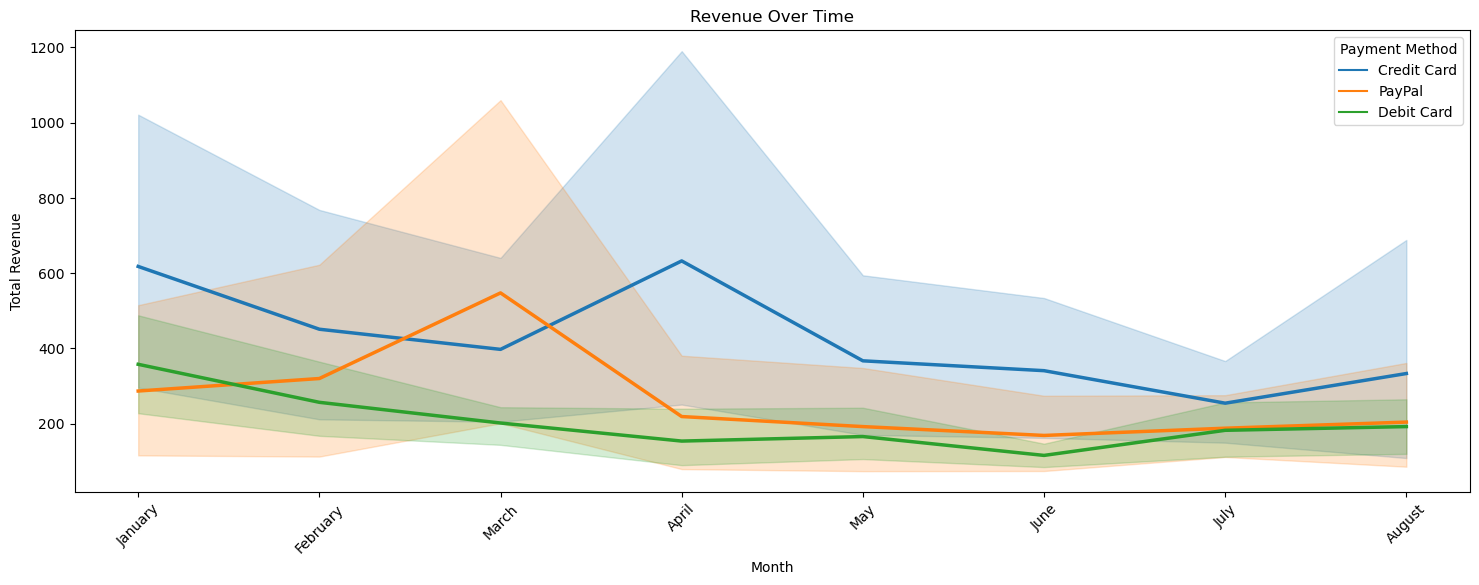

In [111]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Month', y='Total Revenue', hue='Payment Method', linewidth=2.5)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.show()